# EDA - Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #проверка пустых значений в данных

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

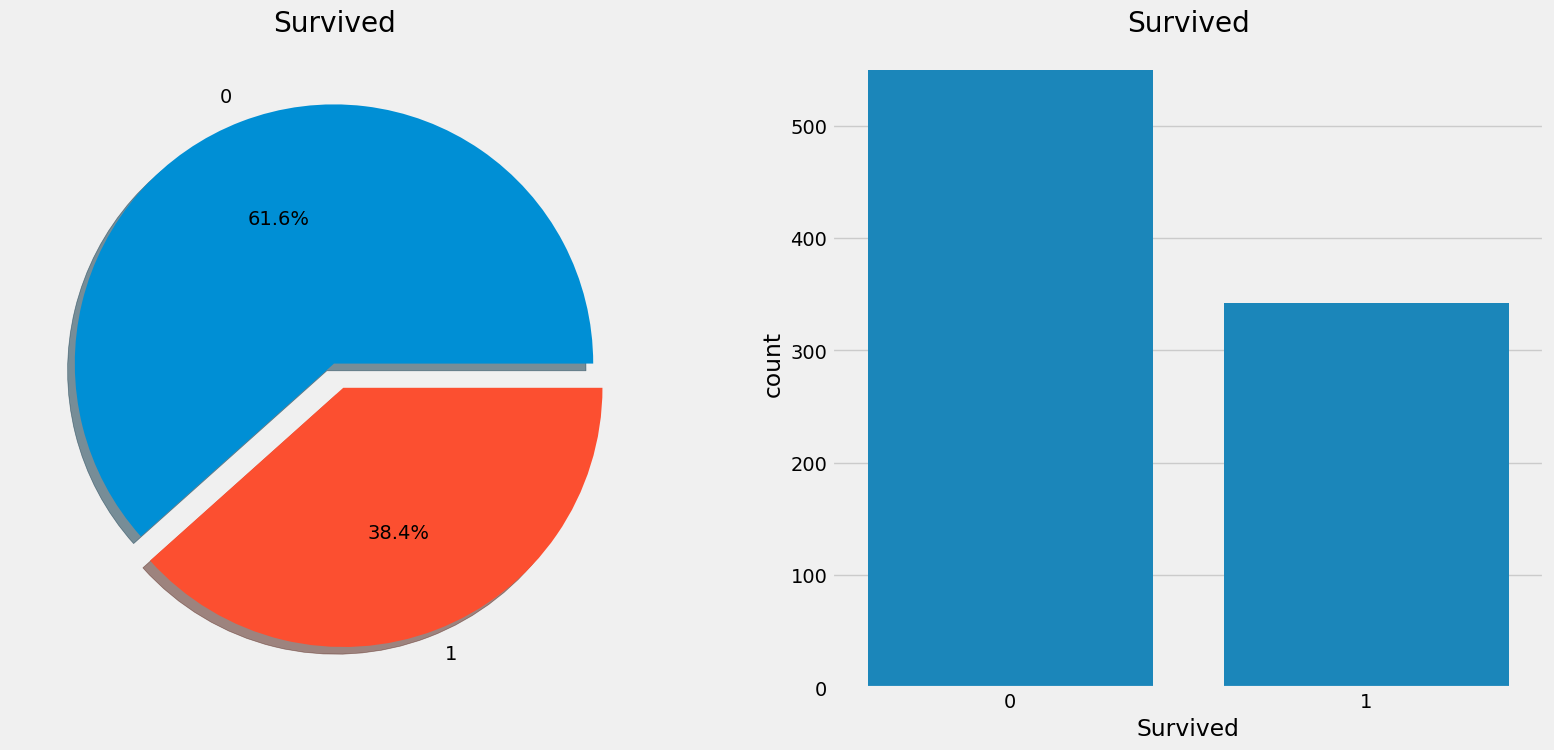

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data[['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
le.fit_transform(data['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [9]:
pd.get_dummies(data['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [10]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

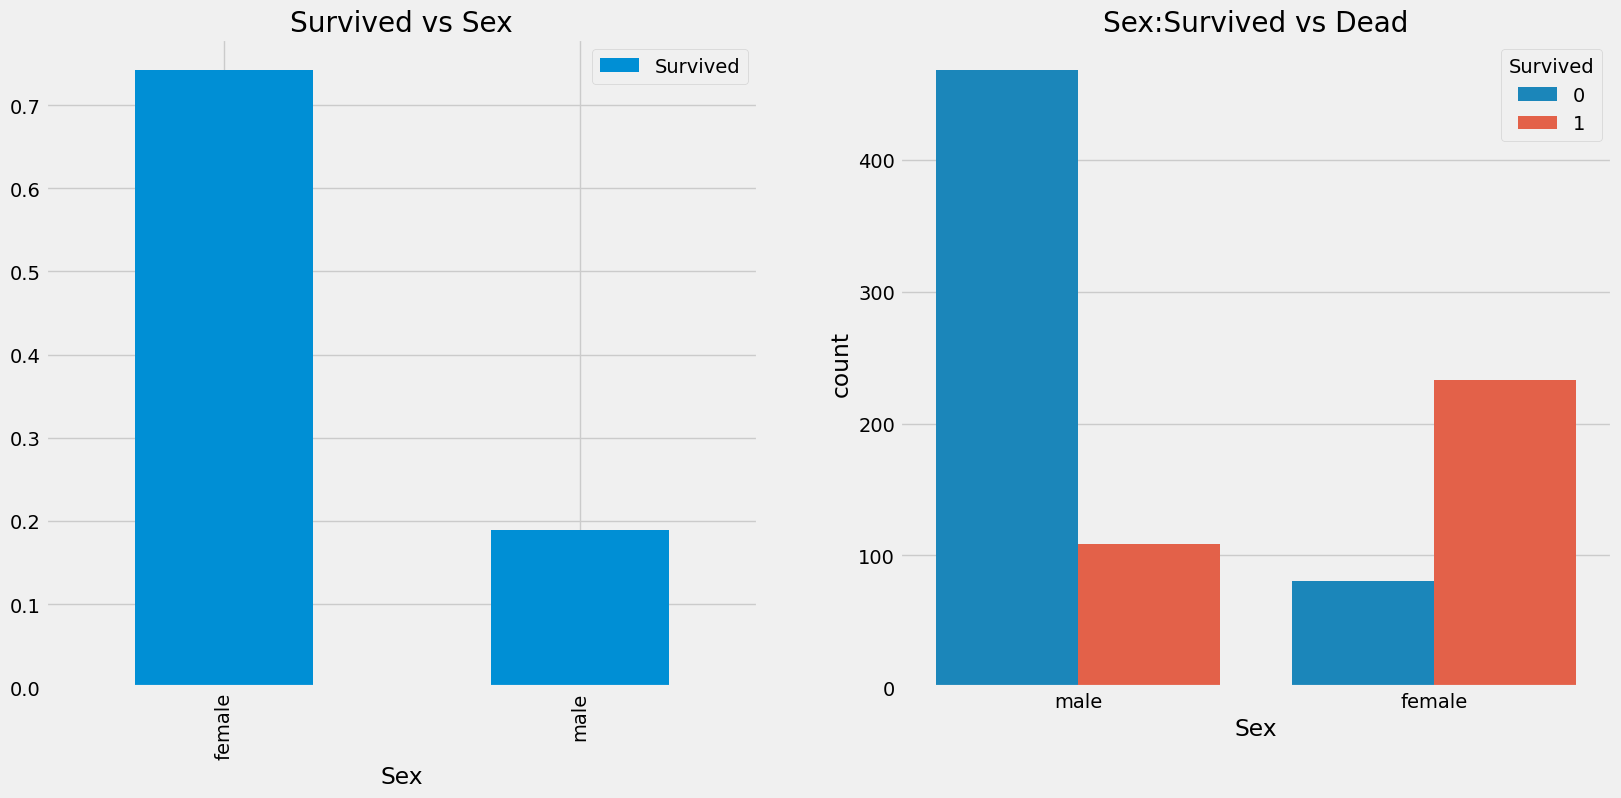

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [12]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


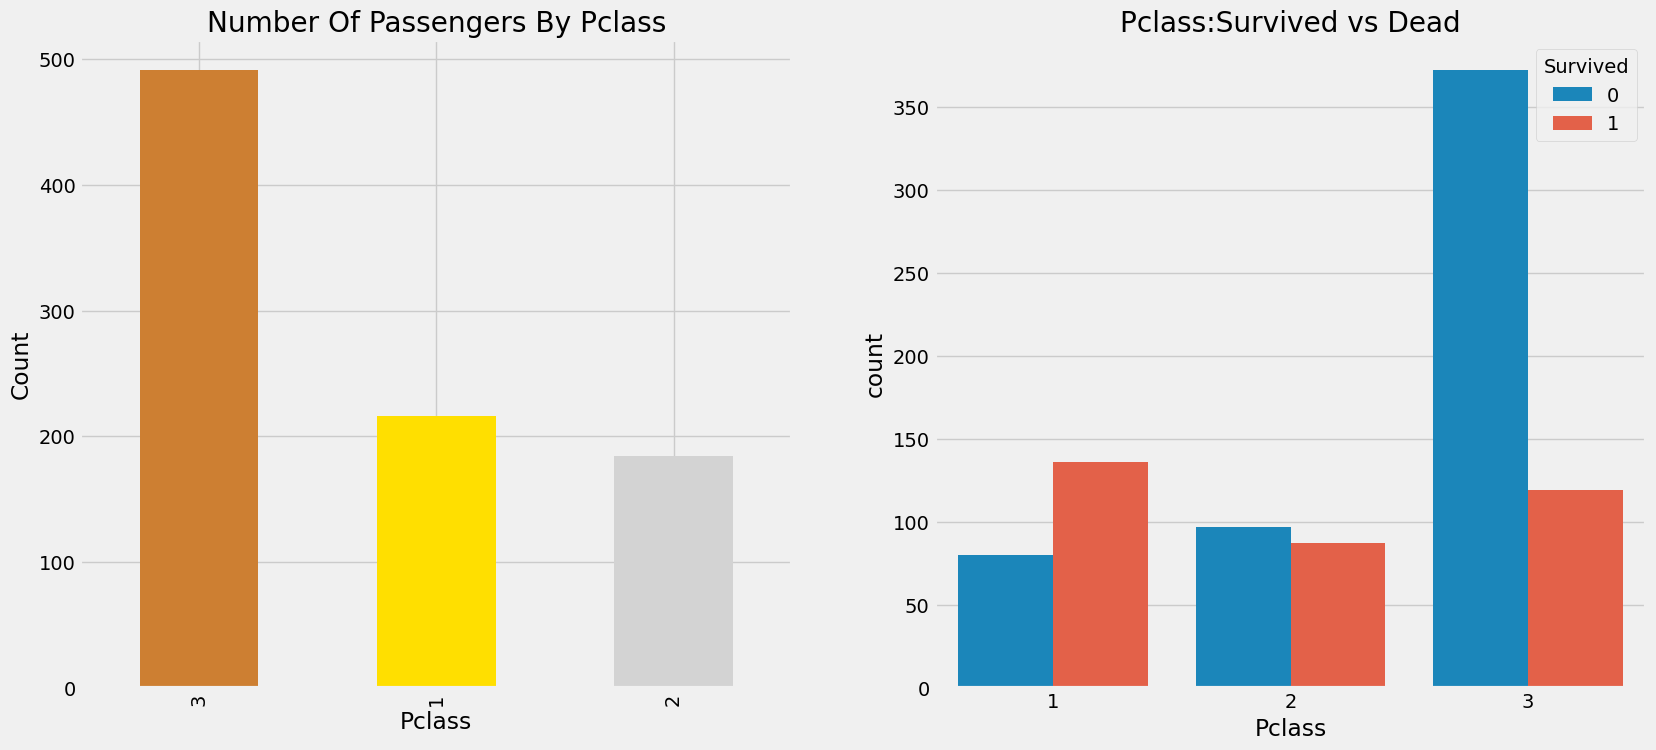

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [14]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

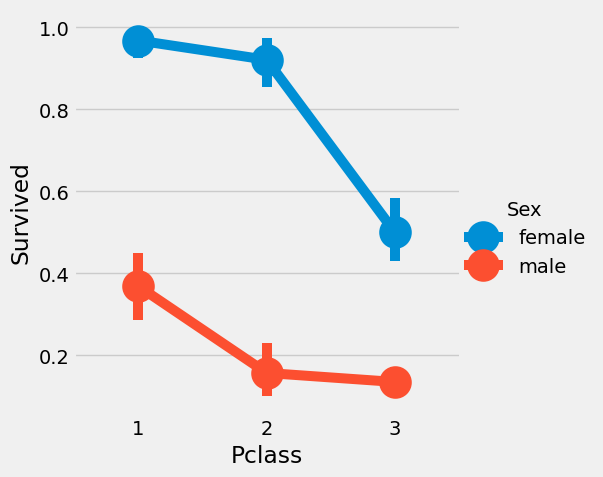

In [15]:
sns.catplot(x="Pclass", y="Survived", hue= "Sex", data=data, kind = "point")
plt.show()

## Age --> Continous Feature

In [16]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


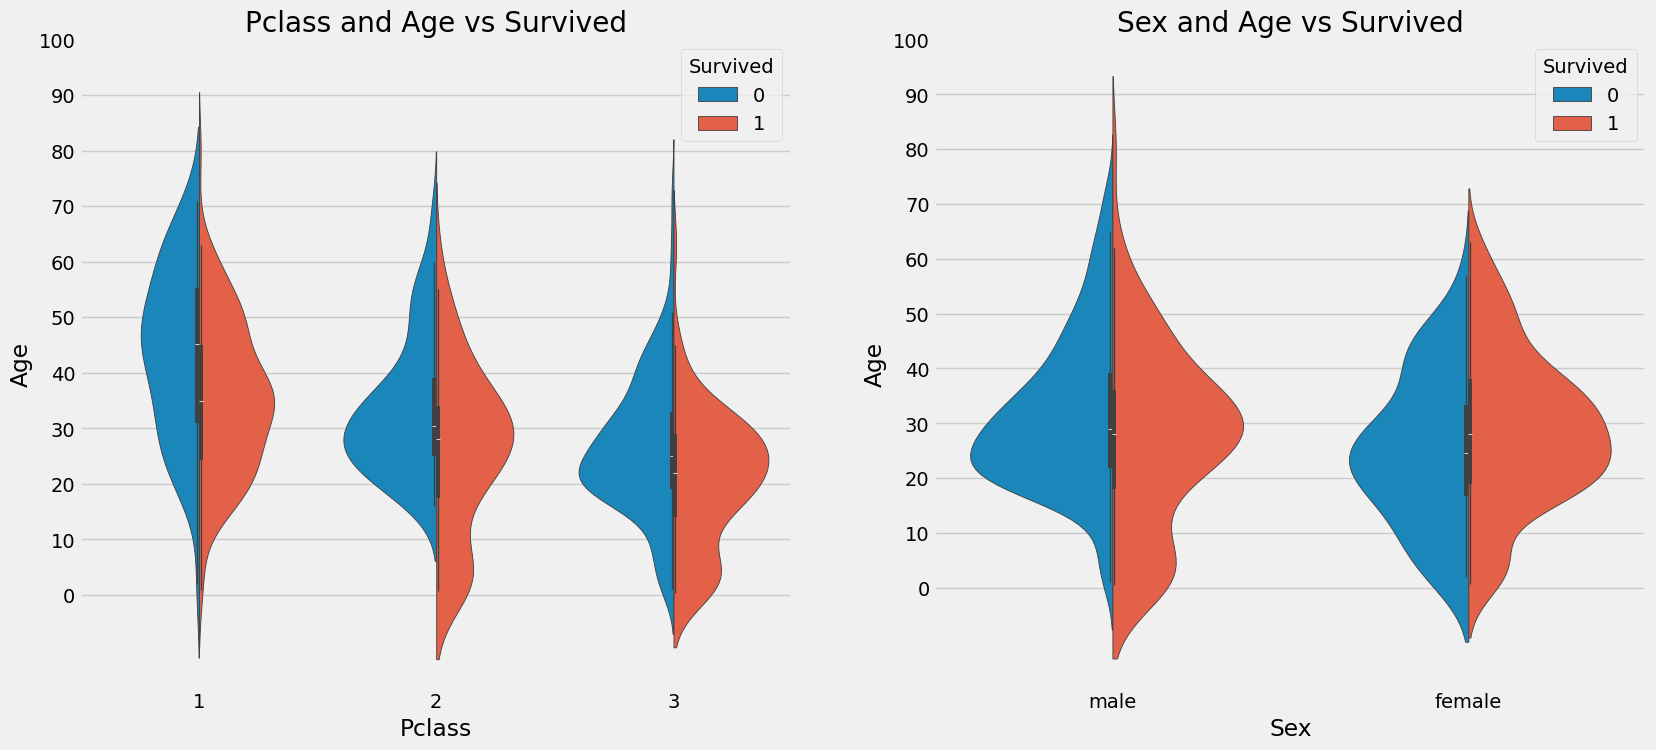

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x= "Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [24]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr'],inplace=True)

In [26]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [28]:
data.groupby("Initial")['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [37]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [39]:
data.Age.isnull().any()

np.False_

In [33]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


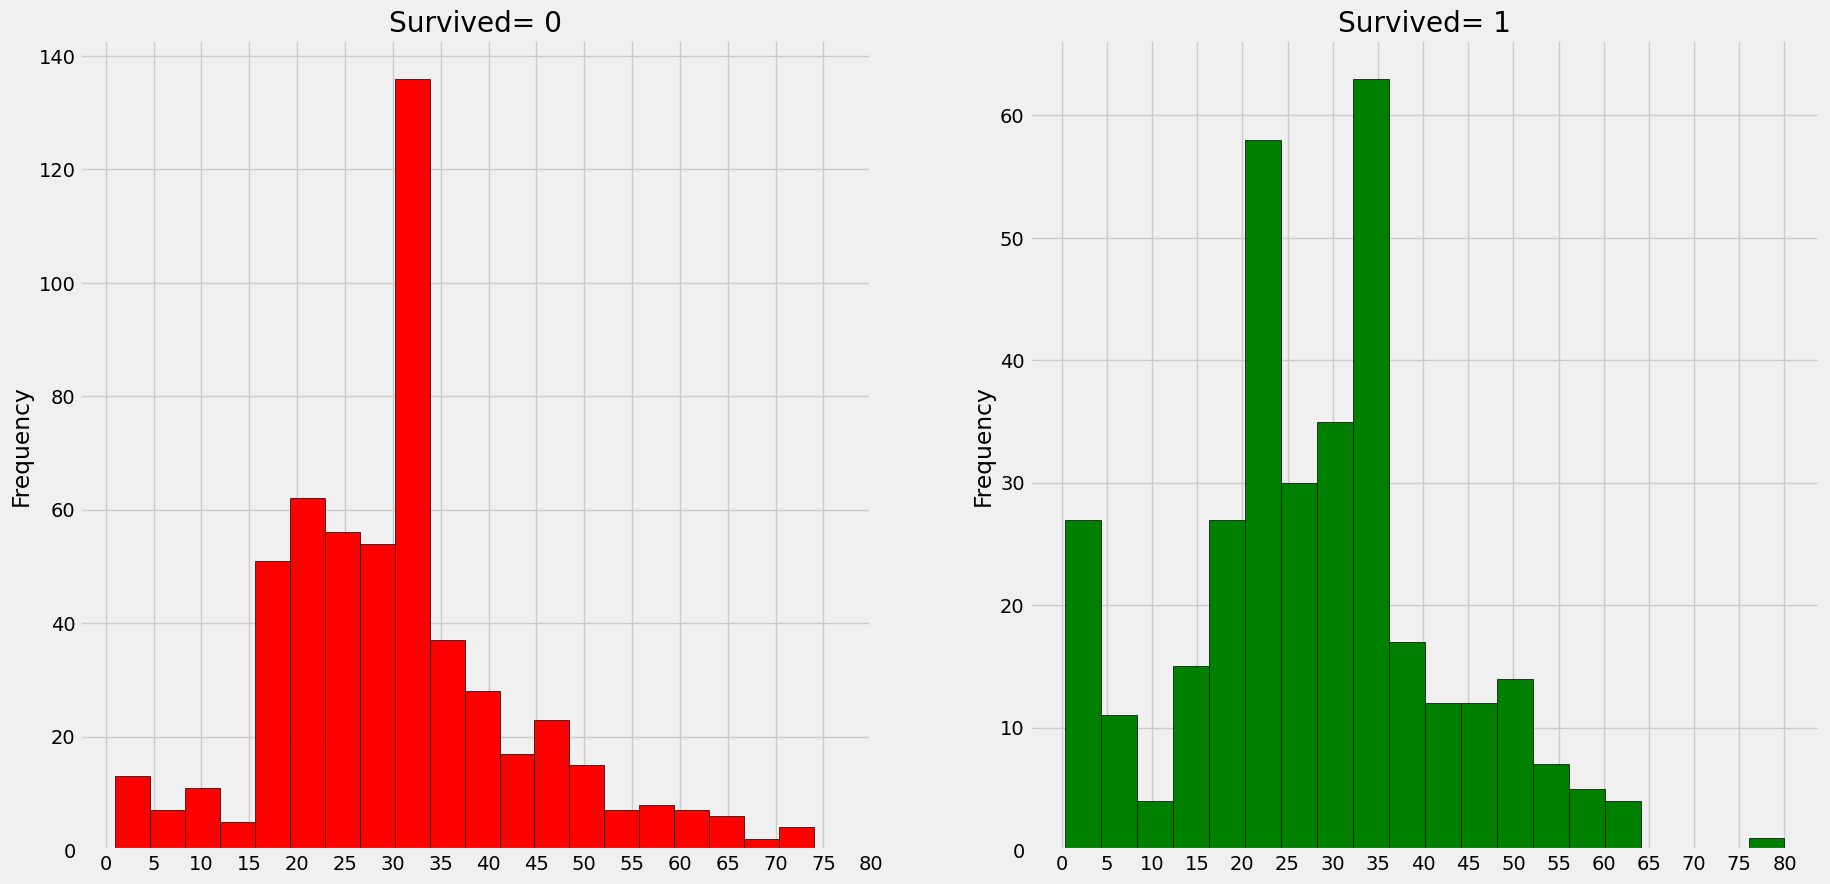

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

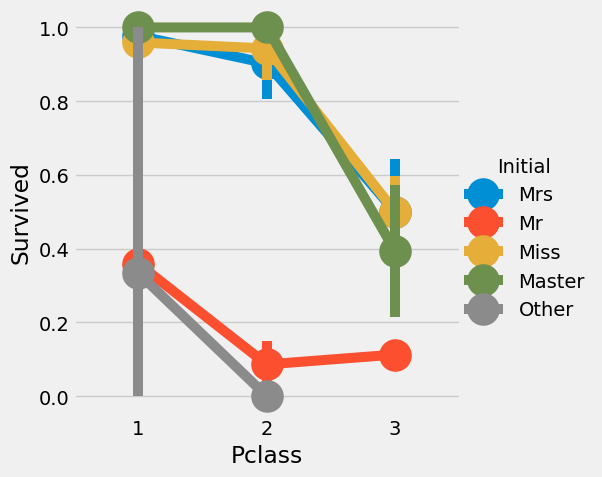

In [41]:
sns.catplot(x="Pclass", y="Survived", hue= "Initial", data=data, kind = "point")
plt.show()

In [42]:
pd.crosstab([data.Embarked, data.Pclass],
            [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

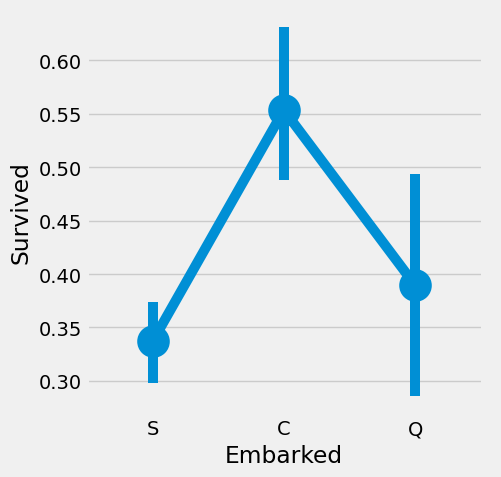

In [43]:
sns.catplot(x="Embarked", y="Survived", data=data, kind = "point")
plt.show()

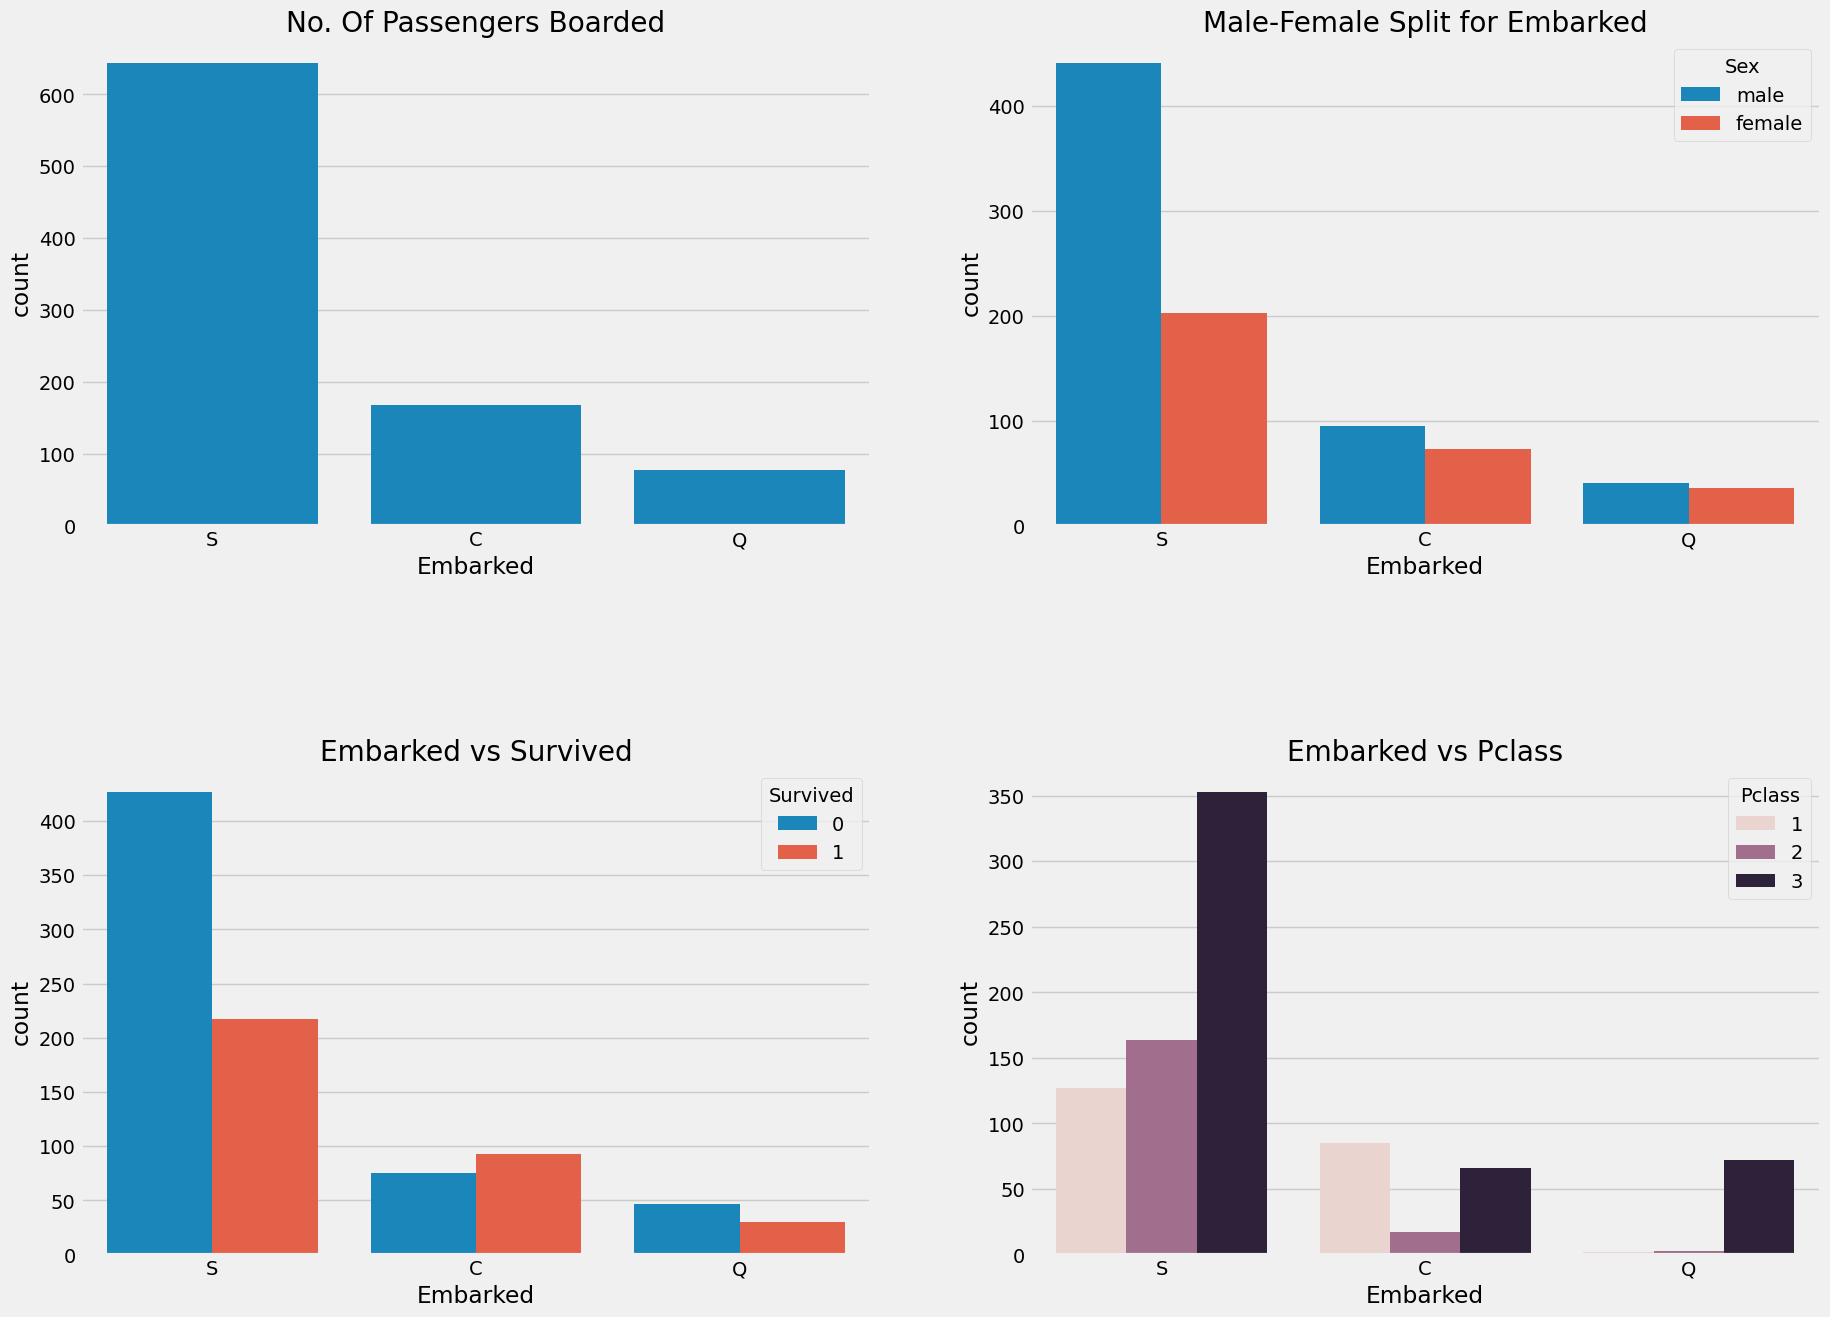

In [44]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

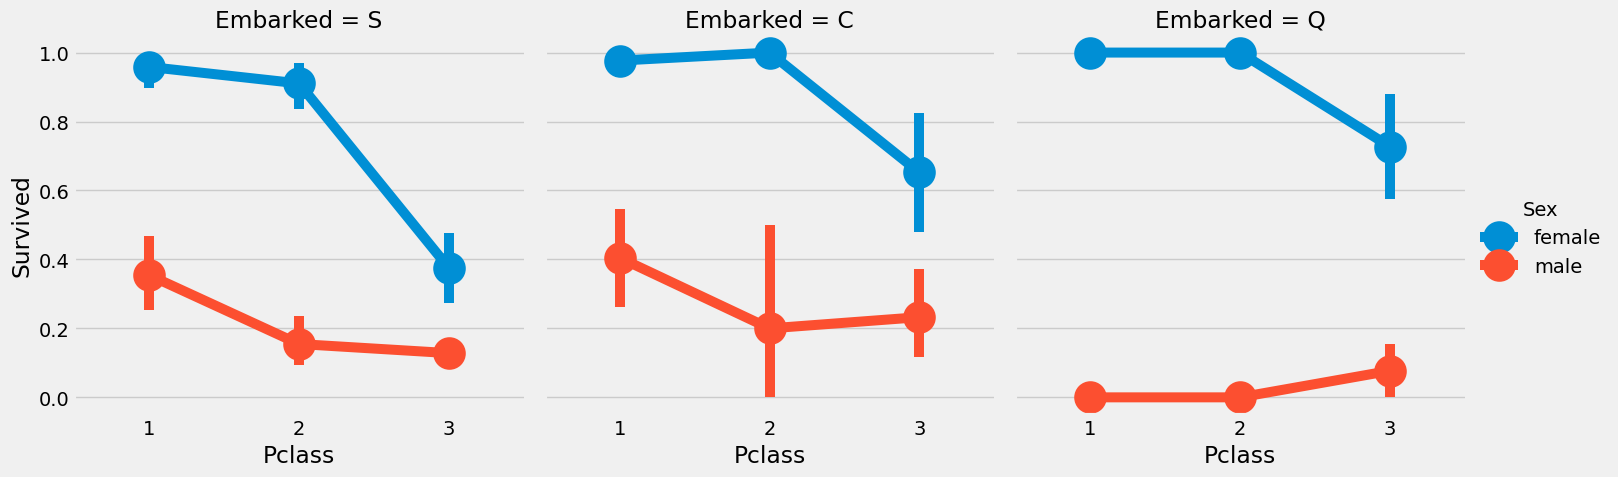

In [45]:
sns.catplot(x="Pclass", y="Survived", hue = 'Sex', col='Embarked', data=data, kind = "point")
plt.show()

In [46]:
data['Embarked'].fillna('S', inplace=True)

In [47]:
data.Embarked.isnull().any()

np.False_

In [48]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


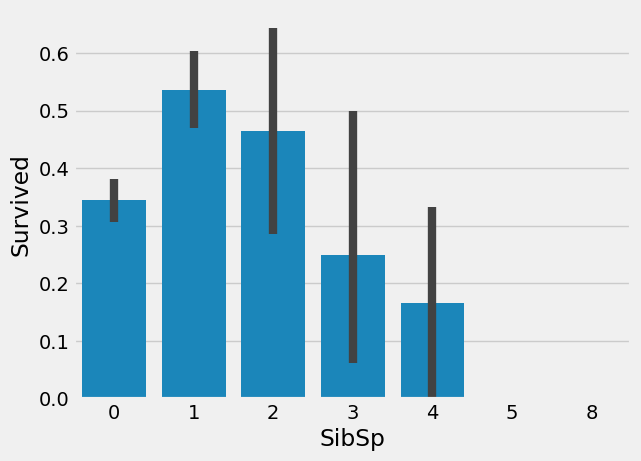

In [51]:
sns.barplot(x="SibSp", y="Survived", data=data)
plt.show()

In [52]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [53]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


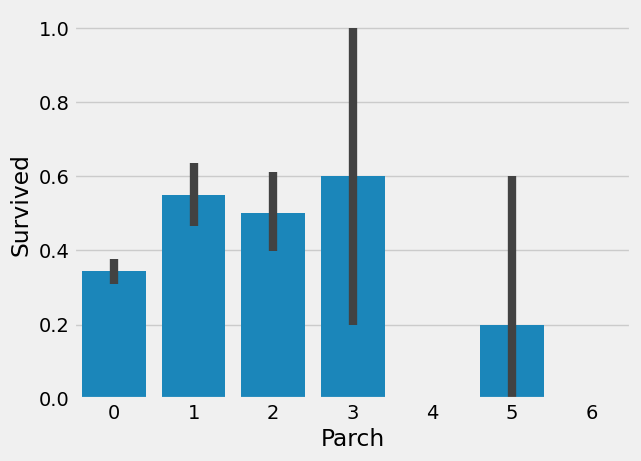

In [54]:
sns.barplot(x="Parch", y="Survived", data=data)
plt.show()

In [57]:
data.Fare.min()


np.float64(0.0)

In [58]:
data.Fare.max()


np.float64(512.3292)

In [59]:
data.Fare.mean()

np.float64(32.204207968574636)

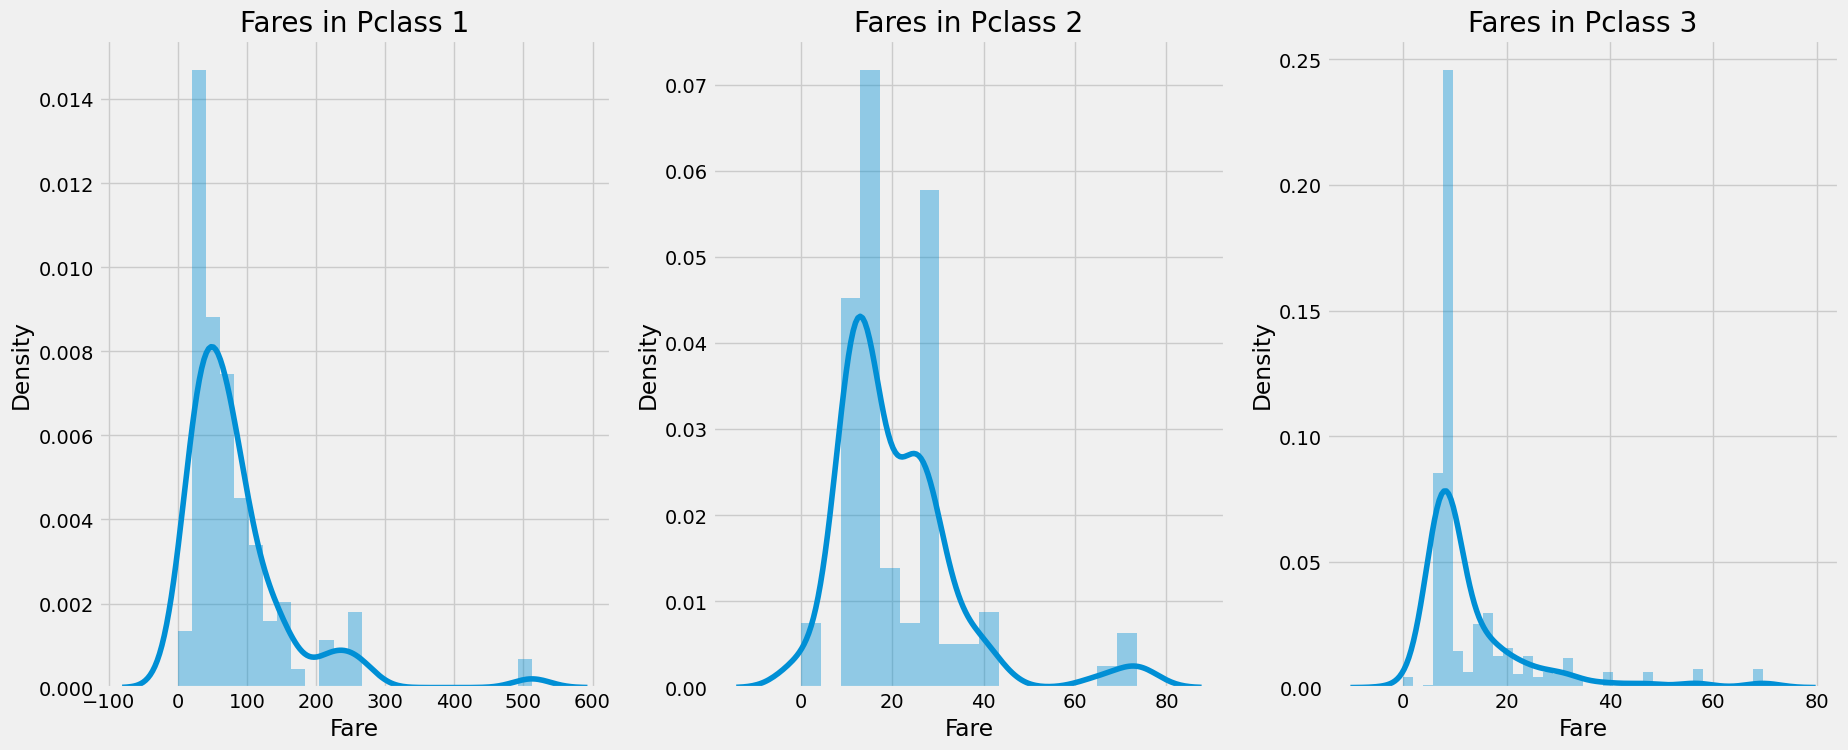

In [60]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [64]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [65]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


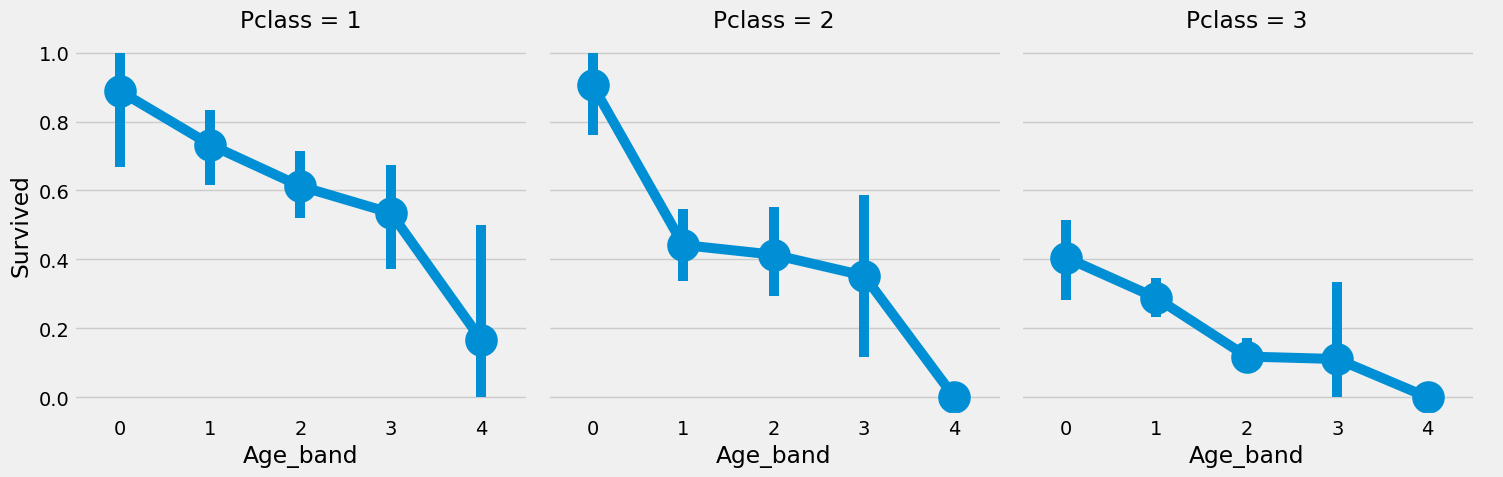

In [74]:
sns.catplot(x="Age_band", y="Survived", data=data, col='Pclass', kind = "point")
plt.show()

In [75]:
data['Family_Size'] = 0

In [76]:
data['Family_Size'] = data['Parch'] + data['SibSp']


In [77]:
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

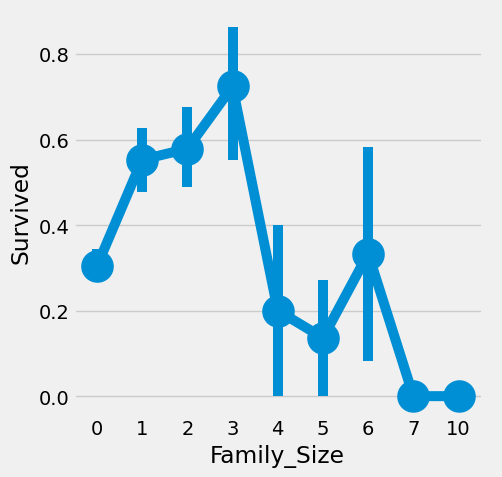

In [78]:
sns.catplot(x="Family_Size", y="Survived", data=data, kind = "point")
plt.show()

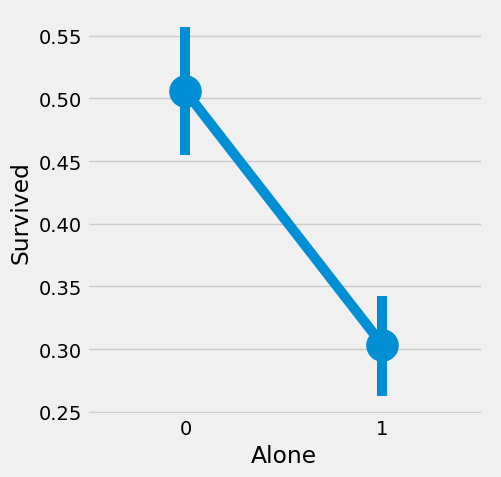

In [79]:
sns.catplot(x="Alone", y="Survived", data=data, kind = "point")
plt.show()

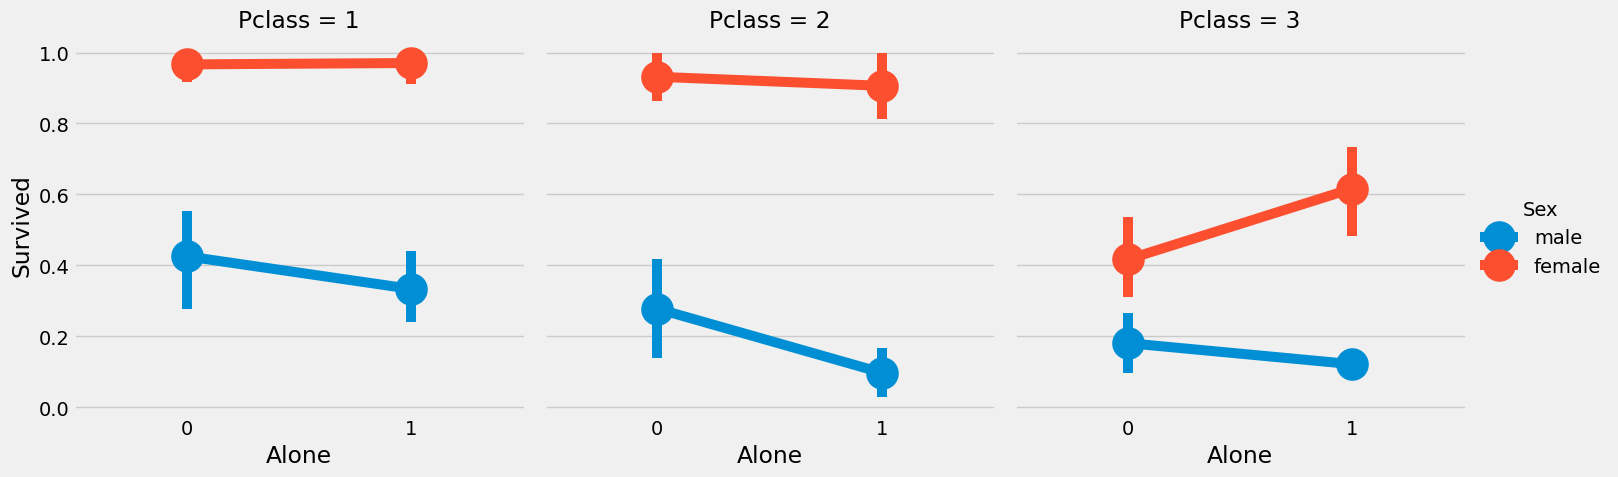

In [80]:
sns.catplot(x="Alone", y="Survived", data=data, hue='Sex', col='Pclass', kind = "point")
plt.show()

In [84]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(["Fare_Range"])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [85]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]"


In [86]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat'] = 3

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


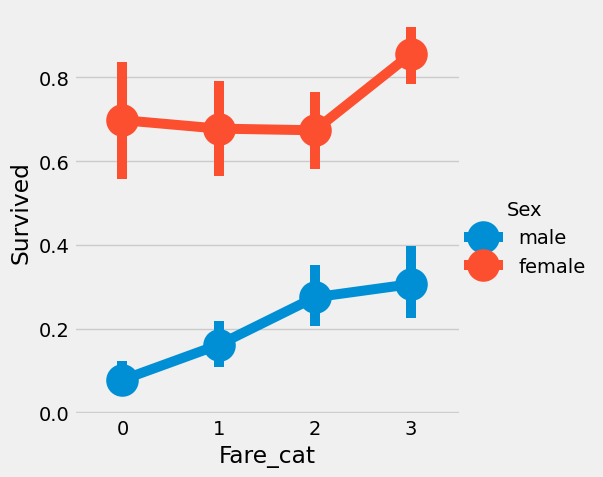

In [87]:
sns.catplot(x="Fare_cat", y="Survived", data=data, hue='Sex', kind = "point")
plt.show()

In [88]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], [0,1,2,3,4], inplace=True)

In [90]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

In [91]:
data.corr()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.106811,-0.085529,-0.110922,0.016639,-0.203367,0.295875
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,0.045702,-0.133054,-0.306292,0.065997,0.135207,-0.628459
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.116569,-0.051687,-0.151096,0.200988,-0.303646,0.248940
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,-0.059961,-0.220119,-0.255242,0.890712,-0.584471,0.394248
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,-0.078665,-0.108352,-0.201196,0.783111,-0.583398,0.393048
Embarked,0.106811,0.045702,0.116569,-0.059961,-0.078665,1.000000,-0.107563,0.023783,-0.080281,0.017807,-0.091096
Initial,-0.085529,-0.133054,-0.051687,-0.220119,-0.108352,-0.107563,1.000000,0.479137,-0.204574,0.012110,0.004202
Age_band,-0.110922,-0.306292,-0.151096,-0.255242,-0.201196,0.023783,0.479137,1.000000,-0.274963,0.203623,0.025075
Family_Size,0.016639,0.065997,0.200988,0.890712,0.783111,-0.080281,-0.204574,-0.274963,1.000000,-0.690922,0.465815
Alone,-0.203367,0.135207,-0.303646,-0.584471,-0.583398,0.017807,0.012110,0.203623,-0.690922,1.000000,-0.568942


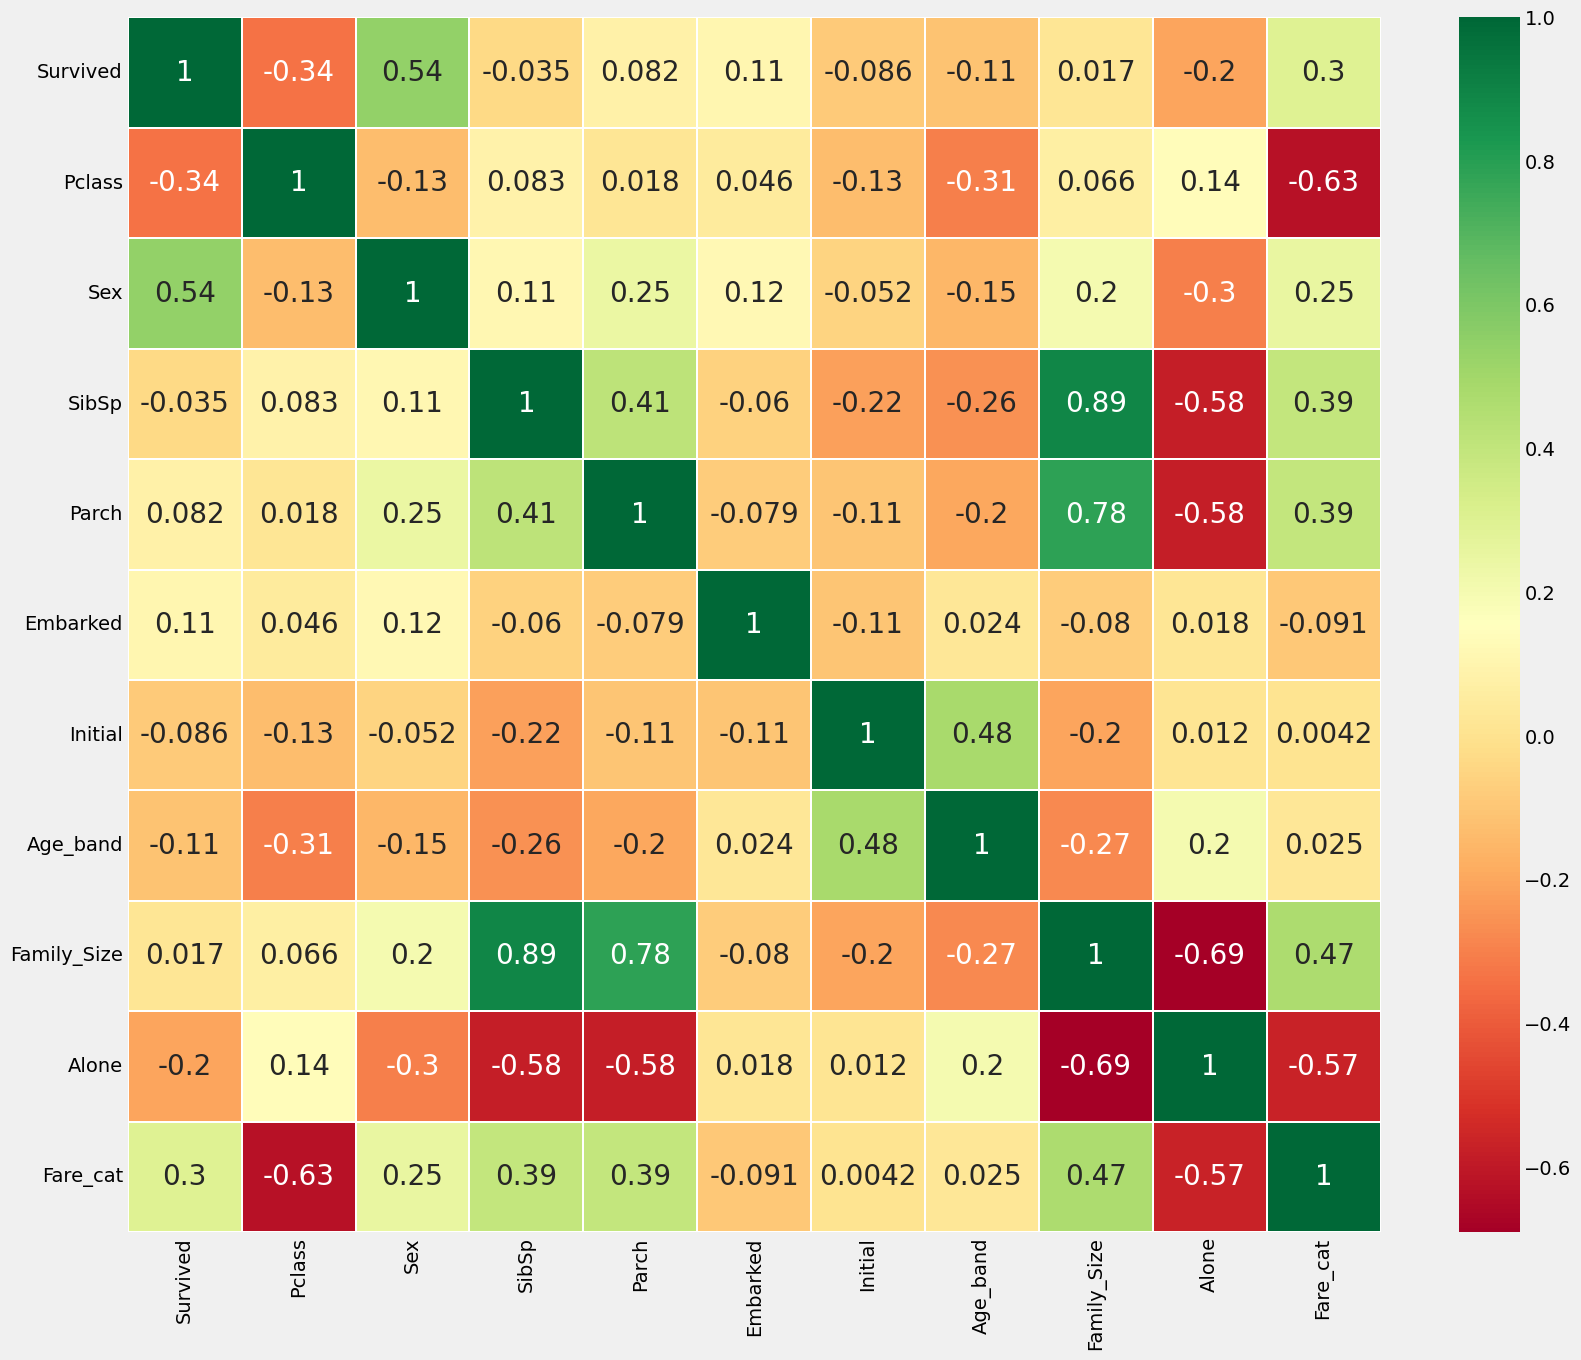

In [93]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()